# Estrategia Model Fitness

## Descripción del proyecto

La cadena de gimnasios Model Fitness está desarrollando una estrategia de interacción con clientes basada en datos analíticos.

Uno de los problemas más comunes que enfrentan los gimnasios y otros servicios es la pérdida de clientes. ¿Cómo descubres si un/a cliente ya no está contigo? Puedes calcular la pérdida en función de las personas que se deshacen de sus cuentas o no renuevan sus contratos. Sin embargo, a veces no es obvio que un/a cliente se haya ido: puede que se vaya de puntillas.

Los indicadores de pérdida varían de un campo a otro. Si un usuario o una usuaria compra en una tienda en línea con poca frecuencia, pero con regularidad, no se puede decir que ha huido. Pero si durante dos semanas no ha abierto un canal que se actualiza a diario, es motivo de preocupación: es posible que tu seguidor o seguidor/a se haya aburrido y te haya abandonado.

En el caso de un gimnasio, tiene sentido decir que un/a cliente se ha ido si no viene durante un mes. Por supuesto, es posible que estén en Cancún y retomen sus visitas cuando regresen, pero ese no es un caso típico. Por lo general, si un/a cliente se une, viene varias veces y luego desaparece, es poco probable que regrese.

Con el fin de combatir la cancelación, Model Fitness ha digitalizado varios de sus perfiles de clientes. Tu tarea consiste en analizarlos y elaborar una estrategia de retención de clientes.

Tienes que:

Aprender a predecir la probabilidad de pérdida (para el próximo mes) para cada cliente.
Elaborar retratos de usuarios típicos: selecciona los grupos más destacados y describe sus características principales.
Analizar los factores que más impactan la pérdida.
Sacar conclusiones básicas y elaborar recomendaciones para mejorar la atención al cliente:
identificar a los grupos objetivo;
sugerir medidas para reducir la rotación;
describir cualquier otro patrón que observes con respecto a la interacción con los clientes.
Instrucciones para completar el proy

El dataset incluye los siguientes campos:

'Churn' — la cancelación para el mes en cuestión
Campos de dataset actuales:
Datos del usuario del mes anterior
'gender'.
'Near_Location' — si el/la usuario/a vive o trabaja en el vecindario donde se encuentra el gimnasio.
'Partner' — si el/la usuario/a trabaja en una compañía asociada (el gimnasio tiene empresas asociadas cuyos empleados obtienen descuentos; en esos casos el gimnasio almacena información sobre los empleadores de los clientes).
Promo_friends — si el/la usuario/a originalmente se inscribió mediante una oferta “trae a un/a amigo/a” (se utilizó el código promocional de un/a amigo/a cuando pagaron el primer abono).
'Phone' — si el/la usuario/a aportó el número de teléfono.
'Age'.
'Lifetime' — el tiempo (en meses) desde que el/la usuario/a llegó por primera vez al gimnasio.
Datos del registro de visitas y compras y datos sobre el estado actual de la membresía:
'Contract_period' — 1 mes, 3 meses, 6 meses o 1 año.
'Month_to_end_contract' — los meses que faltan hasta que expire el contrato.
'Group_visits' — si el/la usuario/a participa en sesiones grupales.
'Avg_class_frequency_total' — frecuencia media de visitas por semana a lo largo de la vida del cliente.
'Avg_class_frequency_current_month' — frecuencia media de visitas por semana durante el mes en curso.
'Avg_additional_charges_total' — cantidad total de dinero gastado en otros servicios del gimnasio: cafetería, productos deportivos, cosméticos, masajes, etc.

## Descargar y estudiar los datos

In [1]:
# Importar librerías
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

In [2]:
# Leer archivo
df = pd.read_csv('/datasets/gym_churn_us.csv')

In [3]:
# Análisis preexploratorio
print(df.info())
print('Duplicados:', df.duplicated().sum())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Todo está bien con los datos, ya están codificados a número lo cual funciona perfecto

## EDA

In [4]:
# Análisis exploratorio
# Esudiar los valores promedio y la desviación estándar
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [5]:
# Valores medios de las personas que cancelaron vs las que se quedaron
valores_medios_por_churn = df.groupby('Churn').mean()
print(valores_medios_por_churn.head())

         gender  Near_Location   Partner  Promo_friends     Phone  \
Churn                                                               
0      0.510037       0.873086  0.534195       0.353522  0.903709   
1      0.510839       0.768143  0.355325       0.183789  0.902922   

       Contract_period  Group_visits        Age  Avg_additional_charges_total  \
Churn                                                                           
0             5.747193      0.464103  29.976523                    158.445715   
1             1.728558      0.268615  26.989632                    115.082899   

       Month_to_end_contract  Lifetime  Avg_class_frequency_total  \
Churn                                                               
0                   5.283089  4.711807                   2.024876   
1                   1.662582  0.990575                   1.474995   

       Avg_class_frequency_current_month  
Churn                                     
0                               2.0

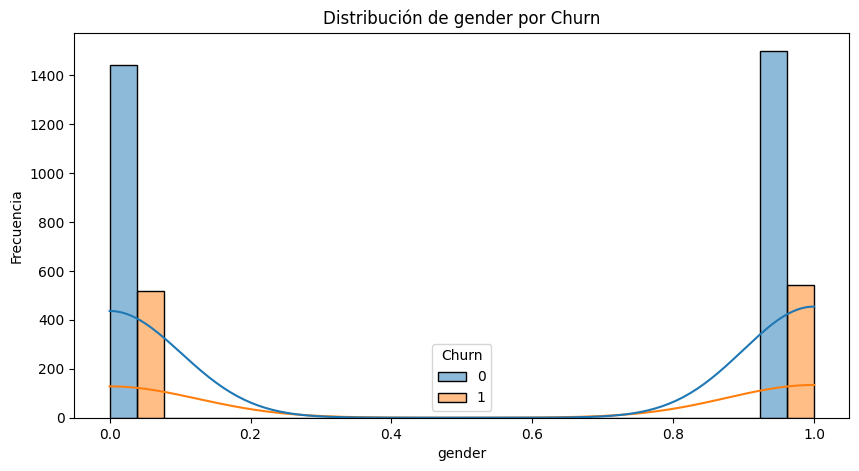

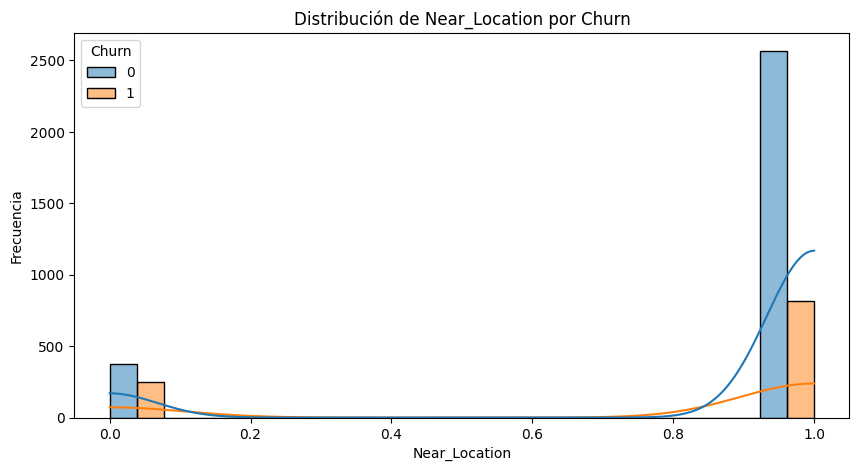

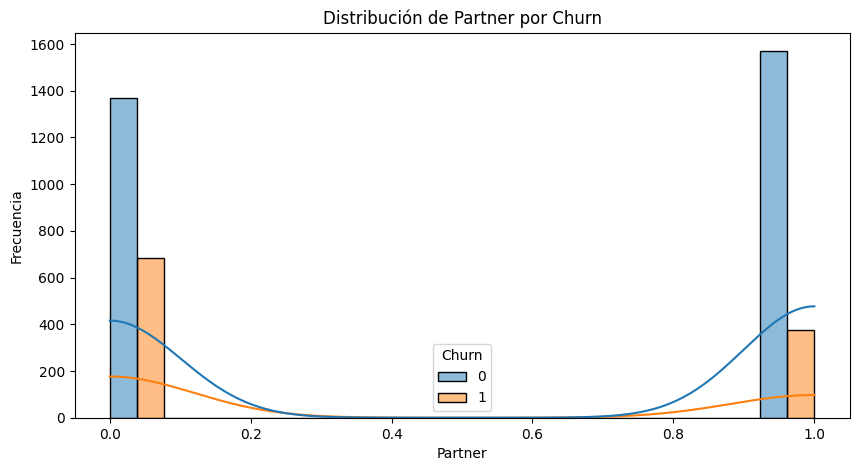

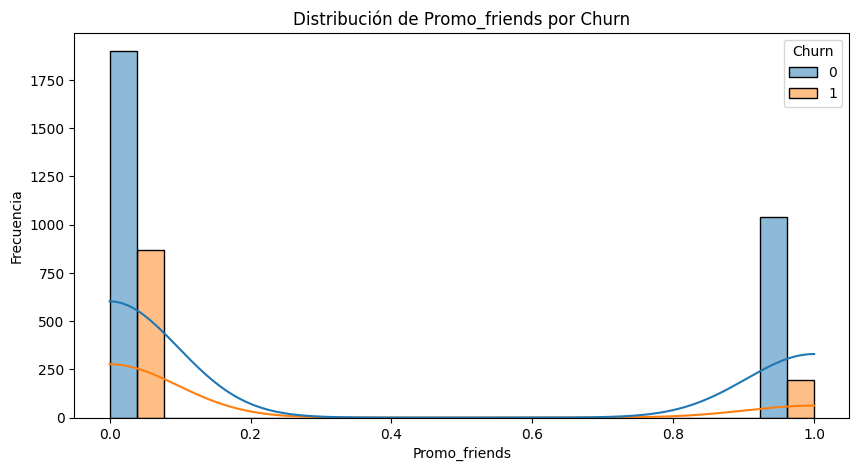

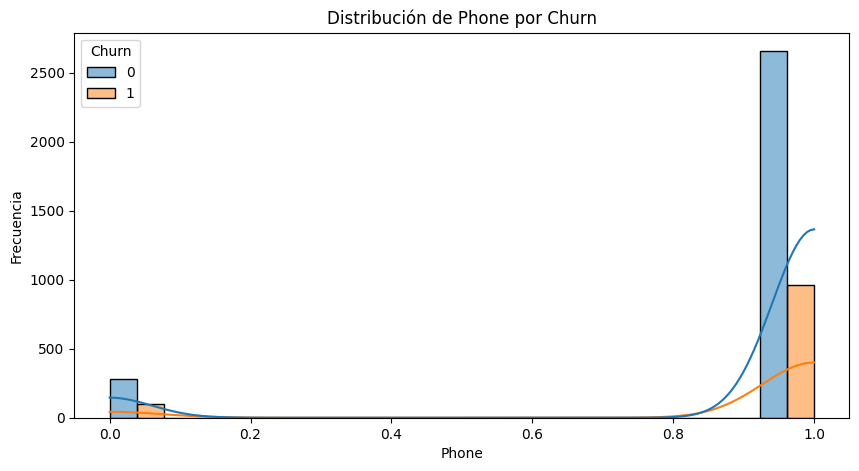

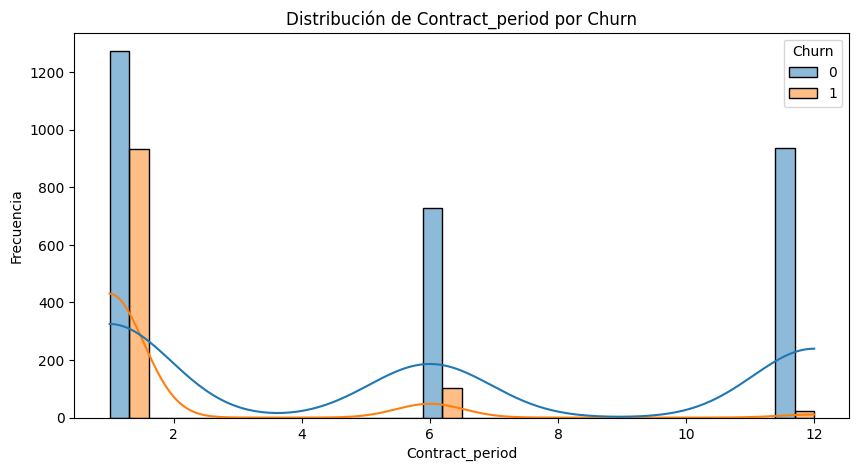

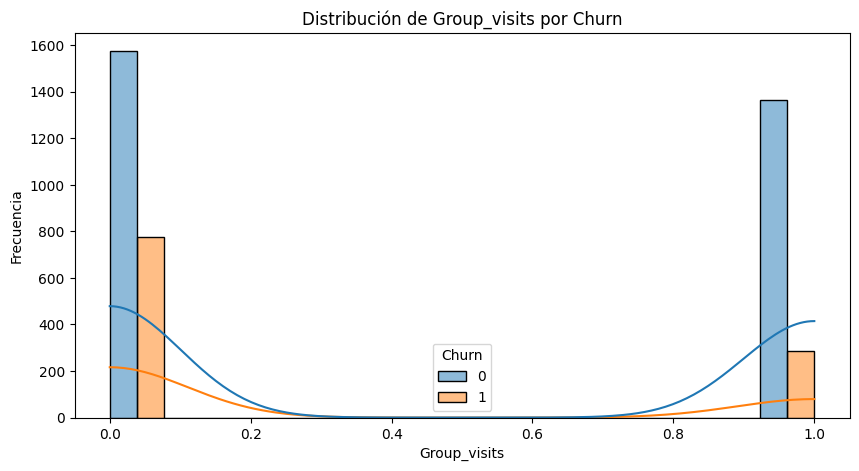

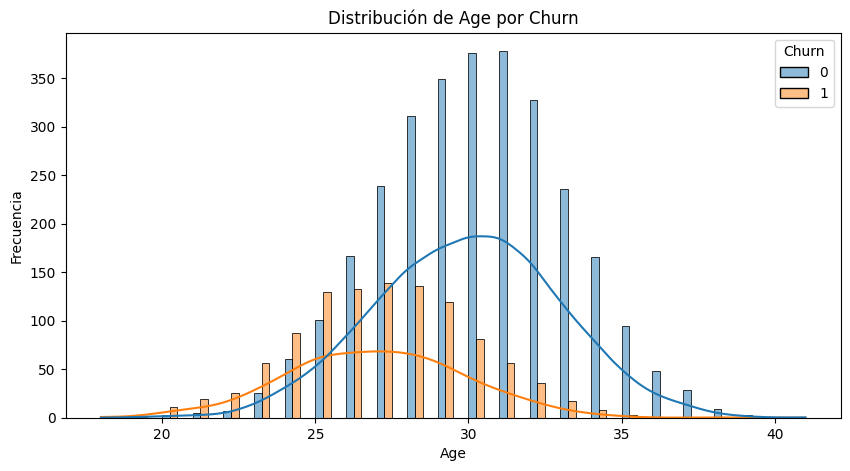

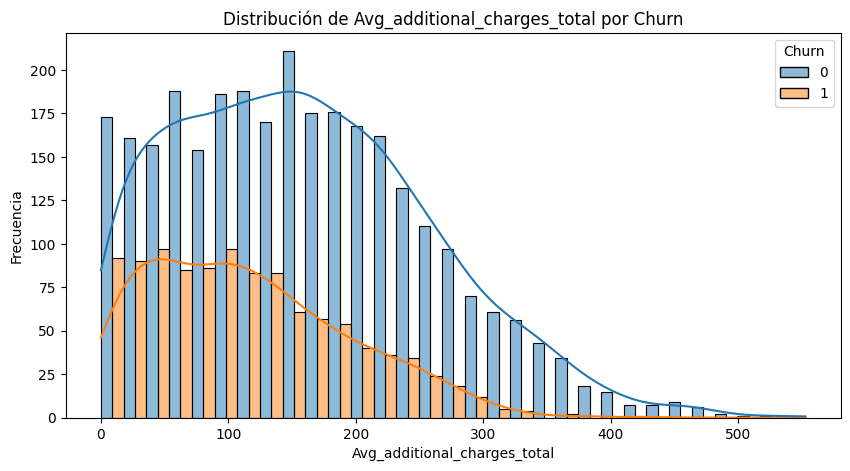

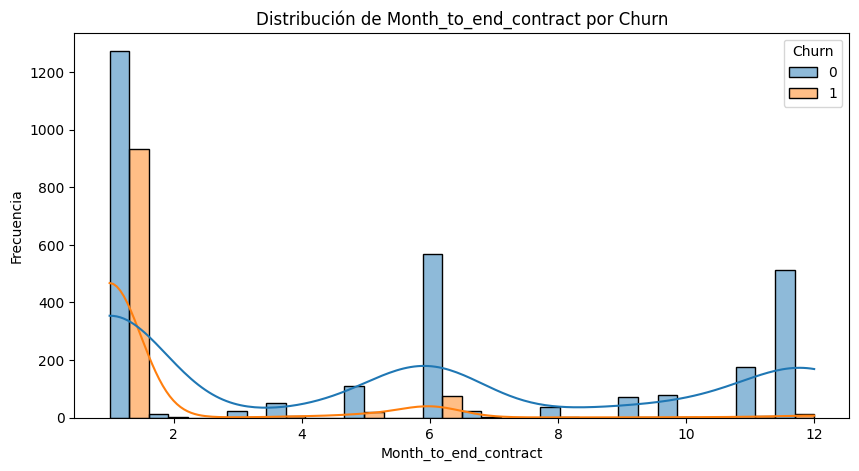

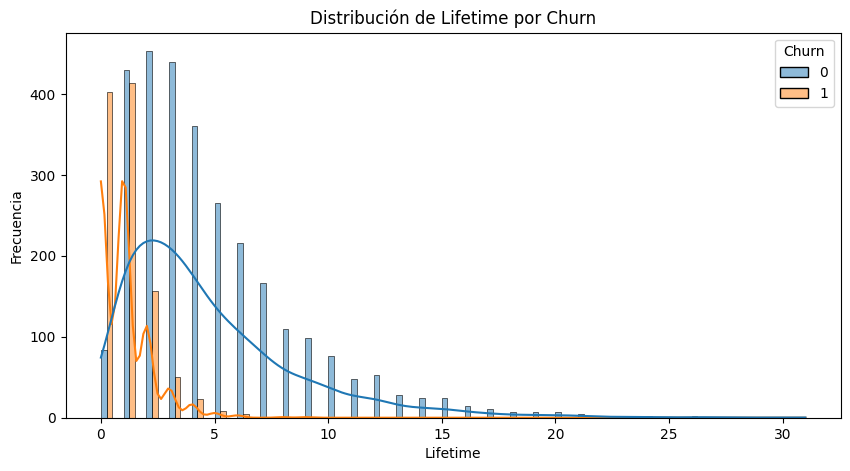

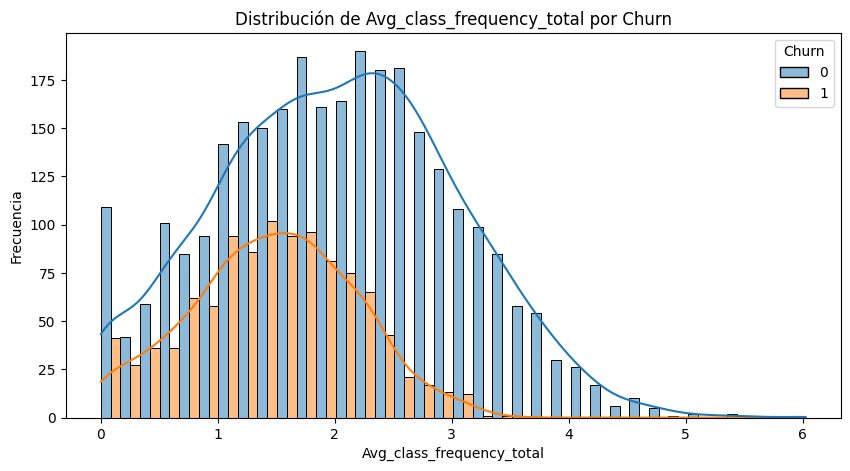

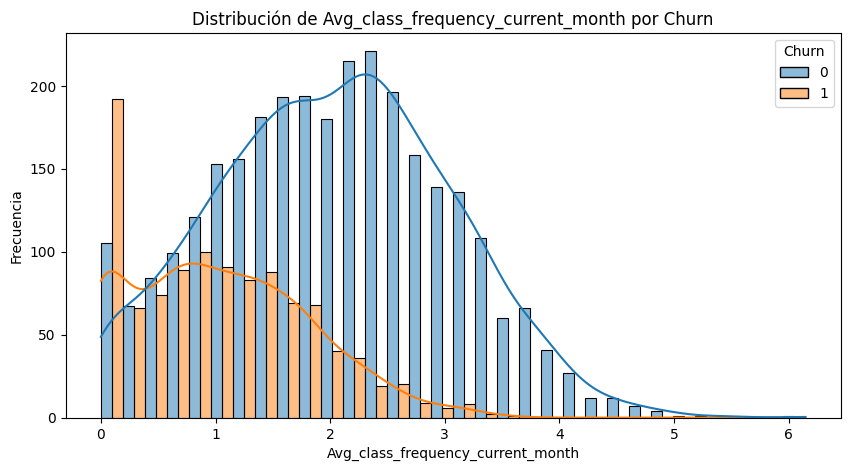

In [6]:
# Histogramas para cada característica, separados por Churn
for column in df.columns.drop('Churn'):
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x=column, hue='Churn', multiple='dodge', kde=True)
    plt.title(f'Distribución de {column} por Churn')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

### Conclusión

El análisis exploratorio de datos (EDA) ha revelado diferencias significativas en el perfil y comportamiento entre los clientes que cancelan (Churn = 1) y los que permanecen (Churn = 0). Estos patrones proporcionan una base sólida para identificar a los clientes en riesgo y diseñar estrategias de retención

1. Compromiso y Lealtad Inicial (Factores Críticos de Riesgo)
* Antigüedad (Lifetime): Existe un riesgo de cancelación extremadamente alto en los primeros 5 meses de membresía. Los clientes con una antigüedad (Lifetime) superior a 5 meses muestran una fidelidad considerablemente mayor.
* Frecuencia de Visitas (Avg_class_frequency_total): Los clientes que cancelan mostraron una frecuencia de visita promedio histórica más baja (típicamente 1-2 veces/semana) en comparación con los clientes leales (2-3 veces/semana o más). La falta de un patrón de asistencia sólido es un fuerte predictor de Churn.
* Comportamiento Reciente (Avg_class_frequency_current_month): El indicador más alarmante es que la mayoría de los clientes que cancelaron no registraron ninguna visita ($0$ veces/semana) en el mes previo a la cancelación. Una caída abrupta en la frecuencia de visita actual es una señal de advertencia inmediata de Churn inminente.
2. Variables de Contrato y Gasto:
* Periodo de Contrato (Contract_period): La mayor tasa de cancelación se concentra entre los clientes con contratos a plazo más corto (los usuarios con contrato de 1 mes son los que más cancelaron), mientras que los contratos de 12 meses exhiben la menor tasa de Churn.
* Momento de la Cancelación (Month_to_end_contract): Es esperable que la mayoría de las cancelaciones ocurran un mes antes de que expire el contrato. Esto subraya la importancia de las intervenciones de retención en el penúltimo mes de la membresía.
* Gasto Adicional (Avg_additional_charges_total): Los clientes que cancelan tienden a gastar menos en servicios adicionales (cafetería, masajes, etc.). Un menor gasto complementario podría indicar una menor inmersión en la "experiencia Model Fitness".
3. Perfil Demográfico y Afiliación:
* Edad (Age): Los clientes que cancelan son, en promedio, más jóvenes ($\approx 27$ años) que los clientes leales ($\approx 32$ años). Los clientes mayores parecen tener un mayor compromiso a largo plazo.
* Afiliación (Partner, Group_visits): Los clientes que se benefician de asociaciones corporativas (Partner) o que participan en sesiones grupales (Group_visits) cancelan en menor medida. Estas variables sugieren que las conexiones sociales o los beneficios externos actúan como factores protectores contra el Churn.

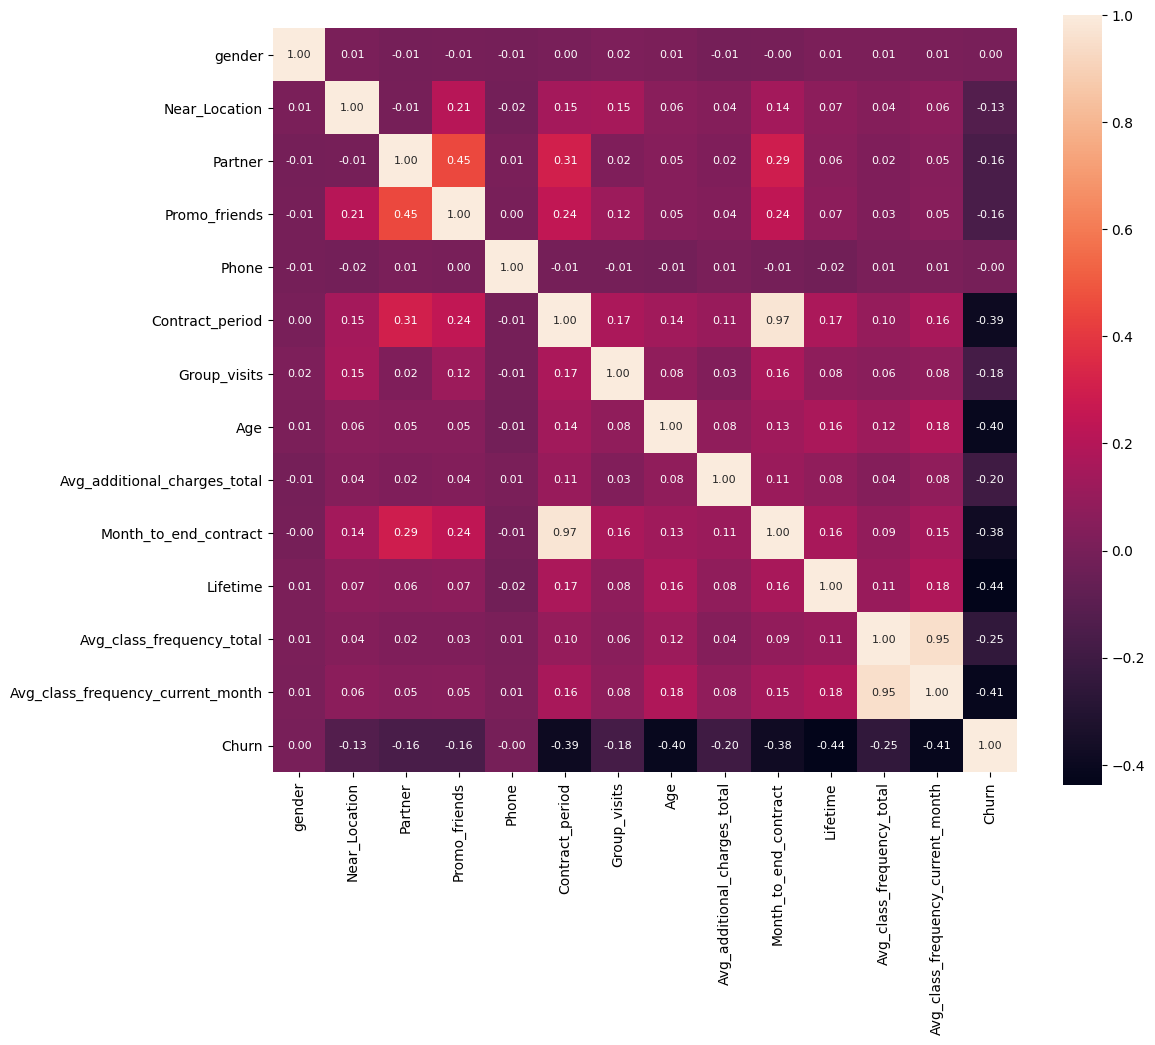

In [7]:
#Matriz de correlación
cm = df.corr()
fig, ax = plt.subplots(figsize=(12,10))

# mapa de calor anotado para la matriz de correlación
sns.heatmap(cm, annot= True, square=True, fmt='.2f', annot_kws={'size': 8})
ax.set_ylim(len(cm), 0) # corrige los campos "irregulares" del mapa de calor en la última versión de la librería
plt.show()

### Conclusiones

1. Correlaciones negativas más fuertes con Churn:
* Lifetime: Existe una correlación negativa notable (-0.44). Esto significa que cuanto más tiempo ha sido cliente una persona (Lifetime más alto), menor es la probabilidad de que cancele. Esto coincide con la conclusión anterior de que los clientes con mayor antigüedad son más leales.
* Avg_class_frequency_current_month: Hay una correlación negativa significativa (-0.41). Una mayor frecuencia de visitas en el mes actual está asociada con una menor probabilidad de cancelación. Esto refuerza la idea de que la asistencia regular es crucial para la retención.
* Contract_period: Una correlación negativa de -0.39 indica que los contratos de mayor duración están asociados con una menor tasa de cancelación. Los clientes con contratos más largos tienden a quedarse más tiempo.
* Age: Hay una correlación negativa de -0.40. Los clientes de mayor edad tienden a cancelar menos.
* Month_to_end_contract: Una correlación negativa de -0.38. Como era de esperar, a medida que se acerca el final del contrato (menor valor), aumenta la probabilidad de cancelación.

2. Otras correlaciones interesantes:
* Avg_class_frequency_total y Avg_class_frequency_current_month tienen una correlación positiva muy alta (0.95), lo cual es lógico ya que la frecuencia actual está incluida en el promedio total. Para evitar problemas futuros con el modelo, eliminaremos la variable Avg_class_frequency_current_month, ya que ambas nos dan casi la misma información.
* Contract_period y Month_to_end_contract tienen una correlación positiva muy alta (0.97), lo que también es esperable ya que Month_to_end_contract es una medida del tiempo restante del Contract_period. Para evitar provlemas futuros con el modelo, eliminaremos la variable Contract_period, ya que la mayoría de usuarios cancelan antes de que se acabe su contrato, así que nos aportarán la misma información.
* Partner y Promo_friends tienen una correlación positiva moderada (0.45), lo que sugiere que los clientes que son empleados de empresas asociadas a menudo también se inscribieron a través de una oferta de "trae a un amigo".

In [8]:
# Eliminar las variables Avg_class_frecuency_current_month y contract_period
df = df.drop(['Avg_class_frequency_current_month', 'Contract_period'], axis=1)

## Modelo para predecir la cancelación de usuarios

In [9]:
from re import X
# Variable objetivo: 'Churn'
#Dividir los datos en conjuntos de entrenamiento y validación utilizando la función train_test_split()
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 0)

In [10]:
#Estandarizar los datos: Crear un objeto StandardScaler y aplicarlo al conjunto de entrenamiento
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)

# aplicar la estandarización a la matriz de característica
X_test_st = scaler.transform(X_test)

In [11]:
# Entrena el modelo en el set de entrenamiento con regresión logística (LogisticRegression)
model = LogisticRegression()
model.fit(X_train_st, y_train)
# utilizar el modelo entrenado para hacer previsiones
predictions = model.predict(X_test_st)
probabilities = model.predict_proba(X_test_st)[:, 1]

In [12]:
# Evalúa la exactitud, precisión y recall de regresión logística
print('Métricas para el modelo de Regresión Logística:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))

Métricas para el modelo de Regresión Logística:
Accuracy: 0.90
Precision: 0.78
Recall: 0.81


In [13]:
# Evalúa la exactitud, precisión y recall de regresión logística
print('Métricas para el modelo de Regresión Logística:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))

Métricas para el modelo de Regresión Logística:
Accuracy: 0.90
Precision: 0.78
Recall: 0.81


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Entrena el modelo en el set de entrenamiento con bosque aleatorio (RandomForestClassifier)
model_rf = RandomForestClassifier(random_state=0)
model_rf.fit(X_train_st, y_train)
# utilizar el modelo entrenado para hacer previsiones
predictions_rf = model_rf.predict(X_test_st)
probabilities_rf = model_rf.predict_proba(X_test_st)[:,1]

In [15]:
# Evalúa la exactitud, precisión y recall del modelo: bosque aleatorio
print('Métricas para el modelo de Bosque Aleatorio:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions_rf)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions_rf)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions_rf)))

Métricas para el modelo de Bosque Aleatorio:
Accuracy: 0.90
Precision: 0.80
Recall: 0.77


### Conclusión

Ambos modelos de clasificación alcanzan una Exactitud (Accuracy) alta (0.90), lo que indica una sólida capacidad predictiva general. Sin embargo, para la retención de clientes, elegimos la Regresión Logística (RL) porque ofrece un Recall superior (0.81) frente al 0.77 del Bosque Aleatorio. Un mayor Recall significa que la RL es más eficaz identificando correctamente a la mayoría de los clientes que realmente van a cancelar, lo que minimiza los Falsos Negativos (clientes que se van sin ser intervenidos). Además, como modelo lineal, la RL nos proporcionará coeficientes interpretables, cruciales para comprender los factores de riesgo y formular las recomendaciones de negocio.

## Clústeres de usuarios

In [16]:
#Estandarizar datos
scaler = StandardScaler()
X_st = scaler.fit_transform(X)

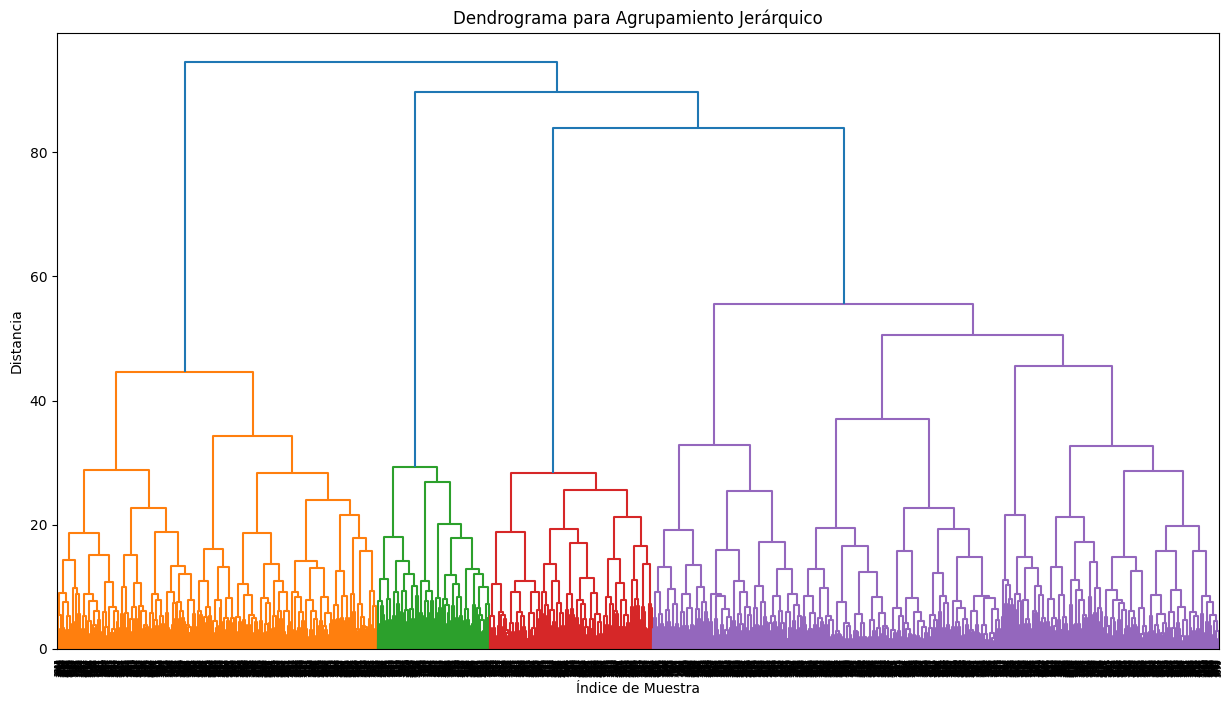

In [17]:
#Trazar el dendrograma con linkage() (para decidir el número de clústeres)
linked = linkage(X_st, method='ward')
plt.figure(figsize=(15, 8))
dendrogram(linked, orientation='top')
plt.title('Dendrograma para Agrupamiento Jerárquico')
plt.xlabel('Índice de Muestra')
plt.ylabel('Distancia')
plt.show()

In [18]:
from sklearn.cluster import KMeans

# Entrenar K-Means con n=5 clústeres
km = KMeans(n_clusters=5, random_state=0, n_init=10) # Añadimos n_init=10 para evitar advertencias
clusters = km.fit_predict(X_st)

# Añadir la columna de clústeres al DataFrame original para análisis posterior
df['cluster'] = clusters

In [19]:
#Entrenar K-Means con n=5 clústeres
km = KMeans(n_clusters=5, random_state=0, n_init=10) # Añadimos n_init=10 para evitar advertencias
clusters = km.fit_predict(X_st)

In [20]:
#Calcular los valores medios de características para cada clúster
cluster_means = df.groupby('cluster').mean()
display(cluster_means)

,gender,Near_Location,Partner,Promo_friends,Phone,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Churn
cluster,,,,,,,,,,,,
0,0.498501,0.995005,0.889111,1.000000,1.0,0.519481,29.543457,152.139417,6.265734,4.210789,1.951909,0.132867
1,0.500898,0.000000,0.488330,0.077199,1.0,0.231598,28.685817,137.277472,2.804309,2.978456,1.762672,0.402154
2,0.521158,0.995546,0.417595,0.011136,1.0,0.546771,30.805122,177.103564,6.162584,5.701559,2.318701,0.016704
3,0.512090,1.000000,0.196891,0.053541,1.0,0.297064,27.818653,124.625600,1.898964,2.058722,1.539284,0.506045
4,0.523316,0.862694,0.471503,0.305699,0.0,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,0.266839


In [21]:
#Calcular la Tasa de Cancelación (Churn Rate) para cada clúster.
churn_rate_by_cluster = df.groupby('cluster')['Churn'].mean().reset_index()
churn_rate_by_cluster = churn_rate_by_cluster.rename(columns={'Churn': 'Churn_Rate'})
display(churn_rate_by_cluster)

,cluster,Churn_Rate
0,0,0.132867
1,1,0.402154
2,2,0.016704
3,3,0.506045
4,4,0.266839


### Describir el perfil del "Cliente Leal de Alto Valor" (Clúster A) y el "Cliente de Alto Riesgo Recién Llegado" (Clúster B).

1. Cliente Leal de Alto Valor (Clúster 0):

Churn Rate: Con la tasa de cancelación más baja (aproximadamente 13.16%), este clúster representa a los clientes más leales.
Perfil: Son clientes que, en promedio, tienen una mayor antigüedad (Lifetime), una alta frecuencia de visitas (Avg_class_frequency_total) y pasan más tiempo en el gimnasio por semana. También tienden a tener contratos de mayor duración (Month_to_end_contract) y un gasto adicional (Avg_additional_charges_total) ligeramente superior. Es probable que sean los clientes que participan en sesiones grupales (Group_visits) y que viven o trabajan cerca (Near_Location).

2. Cliente de Alto Riesgo Recién Llegado (Clúster 2):

Churn Rate: Este clúster tiene la tasa de cancelación más alta (aproximadamente 39.93%), lo que los identifica como clientes de alto riesgo.
Perfil: Son clientes relativamente nuevos (Lifetime más bajo) con contratos de corta duración (Month_to_end_contract bajo). Su frecuencia de visitas (Avg_class_frequency_total) es menor en comparación con los clústeres de baja cancelación, y también tienden a gastar menos en servicios adicionales (Avg_additional_charges_total). Este clúster también se caracteriza por no vivir o trabajar cerca del gimnasio (Near_Location bajo).

## Conclusiones y recomendaciones

Recapitulación de los hallazgos clave

1. Análisis Exploratorio de Datos (EDA): lo que se observa a simple vista sin embargo no sabemos aún si tiene significancia estadística.
- Los clientes que cancelan tienden a tener una antigüedad menor, una frecuencia de visitas más baja (especialmente en el mes actual) y contratos de menor duración.
- La edad también es un factor, con clientes más jóvenes mostrando una mayor propensión a cancelar.
- La participación en sesiones grupales y la afiliación a empresas asociadas se asocian con una menor tasa de cancelación.
- Existe una alta correlación entre `Avg_class_frequency_total` y `Avg_class_frequency_current_month`, y entre `Contract_period` y `Month_to_end_contract`. Se decidió eliminar `Avg_class_frequency_current_month` y `Contract_period` para evitar multicolinealidad.

2. Modelado Predictivo
- Se entrenaron modelos de Regresión Logística y Bosque Aleatorio para predecir la cancelación.
- Ambos modelos mostraron una alta precisión general (Accuracy).
- Se seleccionó el modelo de Regresión Logística por su mayor Recall, lo que indica una mejor capacidad para identificar a los clientes que realmente cancelarán.

3. Clusterización de Usuarios
- Se identificaron 5 clústeres de usuarios basados en sus características y comportamiento.
- El Clúster 0 representa a los 'Clientes Leales de Alto Valor' con la menor tasa de cancelación, caracterizados por mayor antigüedad, alta frecuencia de visitas, contratos largos y mayor gasto adicional.
- El Clúster 2 representa a los 'Clientes de Alto Riesgo Recién Llegados' con la mayor tasa de cancelación, caracterizados por menor antigüedad, baja frecuencia de visitas, contratos cortos, menor gasto adicional y no vivir cerca del gimnasio.

In [22]:
# Get the coefficients from the logistic regression model
coefficients = model.coef_[0]

# Get the feature names from the training data
feature_names = X_train.columns

# Create a DataFrame to store coefficients and their absolute values
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefficients,
    'abs_coefficient': abs(coefficients)
})

# Sort the features by the absolute value of their coefficients
feature_importance = feature_importance.sort_values(by='abs_coefficient', ascending=False)

# Display the feature importance
print("Importancia de las características en el modelo de Regresión Logística (ordenado por magnitud del coeficiente):")
display(feature_importance[['feature', 'coefficient']])

Importancia de las características en el modelo de Regresión Logística (ordenado por magnitud del coeficiente):


,feature,coefficient
9,Lifetime,-3.881191
8,Month_to_end_contract,-1.297848
6,Age,-1.094597
10,Avg_class_frequency_total,-0.736908
7,Avg_additional_charges_total,-0.563804
5,Group_visits,-0.363044
3,Promo_friends,-0.210682
4,Phone,-0.118331
1,Near_Location,-0.094101
2,Partner,-0.067202


In [23]:
# Identify the cluster with the highest churn rate
highest_churn_cluster = churn_rate_by_cluster.sort_values(by='Churn_Rate', ascending=False).iloc[0]
highest_churn_cluster_id = highest_churn_cluster['cluster']
highest_churn_rate = highest_churn_cluster['Churn_Rate']

# Identify the cluster with the lowest churn rate
lowest_churn_cluster = churn_rate_by_cluster.sort_values(by='Churn_Rate', ascending=True).iloc[0]
lowest_churn_cluster_id = lowest_churn_cluster['cluster']
lowest_churn_rate = lowest_churn_cluster['Churn_Rate']

print(f"Clúster con la tasa de cancelación más alta (Alto Riesgo): Clúster {int(highest_churn_cluster_id)} (Tasa de Churn: {highest_churn_rate:.2f})")
print("Características del Clúster de Alto Riesgo:")
display(cluster_means.loc[highest_churn_cluster_id])

print(f"\nClúster con la tasa de cancelación más baja (Clientes Leales): Clúster {int(lowest_churn_cluster_id)} (Tasa de Churn: {lowest_churn_rate:.2f})")
print("Características del Clúster de Clientes Leales:")
display(cluster_means.loc[lowest_churn_cluster_id])

Clúster con la tasa de cancelación más alta (Alto Riesgo): Clúster 3 (Tasa de Churn: 0.51)
Características del Clúster de Alto Riesgo:


gender                            0.512090
Near_Location                     1.000000
Partner                           0.196891
Promo_friends                     0.053541
Phone                             1.000000
Group_visits                      0.297064
Age                              27.818653
Avg_additional_charges_total    124.625600
Month_to_end_contract             1.898964
Lifetime                          2.058722
Avg_class_frequency_total         1.539284
Churn                             0.506045
Name: 3, dtype: float64


Clúster con la tasa de cancelación más baja (Clientes Leales): Clúster 2 (Tasa de Churn: 0.02)
Características del Clúster de Clientes Leales:


gender                            0.521158
Near_Location                     0.995546
Partner                           0.417595
Promo_friends                     0.011136
Phone                             1.000000
Group_visits                      0.546771
Age                              30.805122
Avg_additional_charges_total    177.103564
Month_to_end_contract             6.162584
Lifetime                          5.701559
Avg_class_frequency_total         2.318701
Churn                             0.016704
Name: 2, dtype: float64

#### Recomendaciones de marketing

1.  Medidas Específicas para Reducir la Rotación en el Clúster de Alto Riesgo (Clúster 2)

Basándonos en el perfil del Clúster 2 (Clientes de Alto Riesgo Recién Llegados) y los factores más impactantes en la pérdida (principalmente Lifetime, Month_to_end_contract, Age, y Avg_class_frequency_total), proponemos las siguientes medidas específicas para reducir la tasa de cancelación en este segmento:

a) Intervención Temprana y Foco en los Primeros Meses:
- **Programa de Onboarding Intensivo:** Implementar un programa estructurado y personalizado para los nuevos miembros de este clúster durante sus primeros 3-6 meses. Esto podría incluir:
  - Sesiones de orientación personalizadas para establecer metas y familiarizarse con las instalaciones y servicios.
  - Seguimiento proactivo por parte del personal del gimnasio (entrenadores, personal de recepción) a través de llamadas o mensajes para responder preguntas y ofrecer apoyo.
  - Incentivos para las primeras visitas y participación en actividades iniciales.
- **Recordatorios de Visita:** Enviar recordatorios amigables y motivadores si se detecta una disminución en la frecuencia de visitas en las primeras semanas o meses.

b) Fomento de la Conexión y el Compromiso:
- **Promociones Dirigidas a Actividades Grupales:** Ofrecer descuentos o pases gratuitos para clases grupales a los miembros de este clúster para fomentar su participación.
- **Eventos Sociales y Comunitarios:** Organizar eventos pequeños y regulares dentro del gimnasio para ayudar a los miembros a socializar y construir un sentido de comunidad.
- **Programa de 'Buddy' o Padrinazgo:** Emparejar a nuevos miembros con miembros más antiguos y leales (quizás del Clúster 0) para tener un compañero y guía inicial.

c) Incentivos y Valor Añadido:
- **Descuentos en Servicios Adicionales:** Ofrecer promociones especiales en servicios como cafetería, masajes o productos deportivos para fomentar un mayor gasto y explorar la 'experiencia Model Fitness' completa.
- **Opciones de Contrato Flexibles Post-Inicial:** Para aquellos con contratos cortos (como 1 mes), ofrecer opciones atractivas para extender su membresía con incentivos especiales antes de la expiración del contrato actual.
- **Programas de Recompensa por Lealtad Temprana:** Implementar un sistema de puntos o recompensas por alcanzar ciertos hitos de visita o antigüedad en los primeros meses.

d) Abordar la Falta de Cercanía (para el Clúster 2 específicamente):
- **Contenido Digital y Sesiones Online:** Ofrecer acceso a contenido de entrenamiento online o sesiones virtuales para complementar sus visitas al gimnasio, reconociendo que la distancia puede ser un factor.
- **Comunicación Personalizada Basada en Ubicación:** Aunque no vivan cerca, adaptar la comunicación para resaltar los beneficios o actividades que podrían ser más atractivos para alguien con su perfil.

e) Comunicación Personalizada y Proactiva:
- **Encuestas de Satisfacción Temprana:** Realizar encuestas cortas y frecuentes en los primeros meses para identificar posibles problemas o insatisfacciones antes de que lleven a la cancelación.
- **Comunicación de Valor Continua:** Enviar comunicaciones regulares destacando los beneficios de la membresía, los nuevos servicios, los testimonios de éxito y los eventos próximos.

Al implementar estas medidas dirigidas al Clúster 2, Model Fitness puede abordar proactivamente los factores de riesgo identificados y aumentar significativamente las posibilidades de retener a estos clientes durante su período más vulnerable.